# Импорт библиотек

In [1]:
from pandas import read_csv as read
import pandas as pd
import random

import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as train

from sklearn.feature_selection import RFE

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from plot import pltPRcurve, pltROCcurve

# Используемые модели

In [2]:
models = []
models.append(RandomForestClassifier(n_estimators=110, n_jobs=-1))
models.append(KNeighborsClassifier(n_neighbors=3))
models.append(GaussianNB())
#models.append(GradientBoostingClassifier(max_depth=4))
#models.append(DecisionTreeClassifier())


# Вспомогательные функции

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ожидаемые значения',
           xlabel='Предсказанные значения')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
   

    return ax

    


In [4]:
def plot_corr():
    correlation_matrix = data.corr()
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
    plt.title('Correlation matrix between the features', fontsize=20)
    plt.savefig("cor.png")
    plt.show()

In [5]:
def modExec():
    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)

    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]

    report = metrics.classification_report(expected, predicted)
    conf_matrix = metrics.confusion_matrix(expected, predicted)

    print(type(model).__name__)
    print(f"Acc:\t{accuracy_score(expected, predicted)}")
    print(f"Pre:\t{precision_score(expected, predicted)}")
    print(f"Re:\t{recall_score(expected, predicted)}")
    print(f"F1:\t{f1_score(expected, predicted)}")
    
    print(conf_matrix)

In [15]:
def modExec1(models, drawPR=False, drawRoc=False):
    for model in models:

        model.fit(X_train, y_train)
        expected = y_test
        predicted = model.predict(X_test)

        pobas = model.predict_proba(X_test)
        preds = pobas[:, 1]

        name = type(model).__name__
        
        if name == 'RandomForestClassifier':
            name = 'Случайный лес'
        
        if name == 'KNeighborsClassifier':
            name = 'k-ближайших соседей'
            
        if name == 'GaussianNB':
            name = 'Наивный байесовский классификатор'
        
        if drawPR:
            pltPRcurve(expected, predicted, preds, name)
        
        if drawRoc:
            pltROCcurve(expected, predicted, preds, name)
        
        report = metrics.classification_report(expected, predicted)
        conf_matrix = metrics.confusion_matrix(expected, predicted)

        print(name)
        print(f"Acc: {accuracy_score(expected, predicted)}")
        print(f"Pre: {precision_score(expected, predicted)}")
        print(f"Re: {recall_score(expected, predicted)}")
        print(f"F1: {f1_score(expected, predicted)}")

        # Plot non-normalized confusion matrix
        plot_confusion_matrix(expected, predicted, classes=['Не мош.', 'Мош.'],
                          title=f'{name}')
        plt.grid(False)
        plt.savefig(f"conf{name}.png", dpi=300)
        plt.close()

        print(conf_matrix)
        print()
        

# Анализ на сырых данных

In [7]:
path = "filtData500k.csv"
data = read(path, delimiter=",")

In [8]:
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [9]:
X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

In [16]:
 modExec1(models)

Случайный лес
Acc: 0.9931249729073649
Pre: 0.9941779872470197
Re: 0.8228545204222121
F1: 0.9004394224733208
Confusion matrix, without normalization
[[110966     21]
 [   772   3586]]
[[110966     21]
 [   772   3586]]

k-ближайших соседей
Acc: 0.9908188478044129
Pre: 0.9545329291815927
Re: 0.7948600275355667
F1: 0.8674095405033178
Confusion matrix, without normalization
[[110822    165]
 [   894   3464]]
[[110822    165]
 [   894   3464]]

Наивный байесовский классификатор
Acc: 0.964697212709697
Pre: 0.595460614152203
Re: 0.20468104635153742
F1: 0.3046448087431694
Confusion matrix, without normalization
[[110381    606]
 [  3466    892]]
[[110381    606]
 [  3466    892]]



In [ ]:
plot_corr()

In [ ]:
data.head()

In [ ]:
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)


plot_corr()

# Проектирование признаков

In [ ]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

In [ ]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown


X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

### Отбор признаков рекурсивным исключением

In [ ]:
# feature extraction

model = RandomForestClassifier(n_estimators=110, n_jobs=-1)

rfe = RFE(model, 5)

fit = rfe.fit(X_train, y_train)

print(fit.support_)
print(fit.ranking_)

In [ ]:
model.fit(X_train, y_train)
print(model.feature_importances_)

In [ ]:
l = model.feature_importances_.tolist()
print(l)

In [ ]:
data.head()

In [ ]:
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.head()

In [ ]:
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)

data.head()

In [ ]:
data.drop('step', axis=1, inplace=True)
data.head()

In [ ]:
data.drop('hour', axis=1, inplace=True)
data.head()

In [ ]:
modExec1(models)

# Нормализация

In [17]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown
data.head()

,type,amount,oldbalanceOrg,isFraud,hour,IZoB
0,4,181.00,181.0,1,1,1
1,1,181.00,181.0,1,1,1
2,3,7107.77,183195.0,0,1,0
3,3,671.64,15123.0,0,1,0
4,3,1373.43,13854.0,0,1,0


In [18]:
X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

In [19]:
modExec1(models)

Случайный лес
Acc: 0.9962460444752699
Pre: 0.9870935716058575
Re: 0.9125745754933455
F1: 0.9483724812209371
Confusion matrix, without normalization
[[110935     52]
 [   381   3977]]
[[110935     52]
 [   381   3977]]

k-ближайших соседей
Acc: 0.9967575534266765
Pre: 0.9556267154620312
Re: 0.9586966498393759
F1: 0.9571592210767469
Confusion matrix, without normalization
[[110793    194]
 [   180   4178]]
[[110793    194]
 [   180   4178]]

Наивный байесовский классификатор
Acc: 0.9634661233690234
Pre: 0.547682119205298
Re: 0.18976594768242314
F1: 0.28186775732788
Confusion matrix, without normalization
[[110304    683]
 [  3531    827]]
[[110304    683]
 [  3531    827]]



In [ ]:
dataset = pd.DataFrame({'type':X[:,0],'amount':X[:,1], 'hour':X[:,2], 'iZoB':X[:,3]})
dataset.head()

In [20]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(X)
standardized_X = preprocessing.scale(X)

In [ ]:
dataset = pd.DataFrame({'type':normalized_X[:,0],'amount':normalized_X[:,1], 'hour':normalized_X[:,2], 'iZoB':normalized_X[:,3]})
dataset.head()

Случайный лес
Acc: 0.9997832589188955
Pre: 0.9997693194925029
Re: 0.9944928866452502
F1: 0.9971241228574717
Confusion matrix, without normalization
[[110986      1]
 [    24   4334]]
[[110986      1]
 [    24   4334]]

k-ближайших соседей
Acc: 0.9989596428106984
Pre: 0.9976514795678723
Re: 0.9747590637907297
F1: 0.9860724233983287
Confusion matrix, without normalization
[[110977     10]
 [   110   4248]]
[[110977     10]
 [   110   4248]]

Наивный байесовский классификатор
Acc: 0.9615414625688153
Pre: 0.1953125
Re: 0.005736576411197797
F1: 0.011145786892554615
Confusion matrix, without normalization
[[110884    103]
 [  4333     25]]
[[110884    103]
 [  4333     25]]



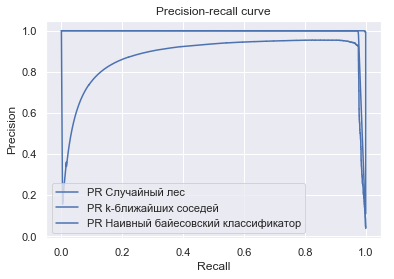

In [21]:
X = normalized_X
X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

modExec1(models, True, False)

In [ ]:
X = standardized_X
X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

modExec1(models)

# Попытки amount и oldbalanceOrg на amountToOld

In [ ]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)
data.drop('LTS', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)

In [ ]:
data['amountToOld'] = data['amount'] / data['oldbalanceOrg']

data.loc[data.amountToOld > 1000000000, 'amountToOld'] = -1
data.fillna(-1)
data.drop('amount', axis=1, inplace=True)
data.drop('oldbalanceOrg', axis=1, inplace=True)
data['amountToOld'].max()

In [ ]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

model = GaussianNB()
modExec()


model = KNeighborsClassifier(n_neighbors=3)
modExec()


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()
data.head()